# Lecture 5: ML Workflow

MTU Spring 2025

Instructor: Amna Mazen

## Imports

In [1]:
import sys
import time

import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import HTML

sys.path.append("code/.")


from IPython.display import display
#from plotting_functions import *

# Classifiers and regressors
from sklearn.dummy import DummyClassifier, DummyRegressor

# Preprocessing and pipeline
from sklearn.impute import SimpleImputer

# train test split and cross validation
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from utils import *

pd.set_option("display.max_colwidth", 200)

## Data Splitting


- Keep aside some randomly selected portion from the training data.
- `fit` (train) a model on the training portion only.
- `score` (assess) the trained model on this set aside data to get a sense of how well the model would be able to generalize.
- Pretend that the kept aside data is representative of the real distribution $D$ of data.

- We can pass `X` and `y` or a dataframe with both `X` and `y` in it.
- We can also specify the train or test split sizes.

### Simple Rnadom Sampling (SRS)

#### scikit-learn train_test_split


In [2]:
url = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html"
HTML("<iframe src=%s width=1000 height=800></iframe>" % url)

/usr/local/lib/python3.11/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [3]:


import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)

iris_df['class']=iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']


X = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]

iris_df['class'].value_counts()


,count
class,
0,50
1,50
2,50


The Iris dataset has three classes: **Iris setosa**, **Iris versicolor**, and **Iris virginica**.

Each class has **50** samples, and each sample has four features: the length and width of the sepals and petals in centimeters.



![Iris Dataset](https://raw.githubusercontent.com/MazenMTULab/ML_COURSE_RESOURCES/refs/heads/main/Figs/iris-flower.webp)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.8,
                                                   random_state=None,
                                                   shuffle=True, stratify=None)

print("Class distribution of train set")
print(y_train.value_counts())
print()
print("Class distribution of test set")
print(y_test.value_counts())

Class distribution of train set
class
0    42
2    41
1    37
Name: count, dtype: int64

Class distribution of test set
class
1    13
2     9
0     8
Name: count, dtype: int64


### Stratified sampling

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.8,
                                                   random_state=None,
                                                   shuffle=True, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())

class
2    40
0    40
1    40
Name: count, dtype: int64
class
1    10
0    10
2    10
Name: count, dtype: int64


### Train/validation/test split

- Some of you may have heard of "validation" data.
- Sometimes it's a good idea to have a separate data for hyperparameter tuning.

![](img/train-valid-test-split.png)

<!-- <img src='img/train-valid-test-split.png' width="1500" height="1500" /> -->

## Cross Validation

```{important}
Keep in mind that cross-validation does not return a model. It is not a way to build a model that can be applied to new data. The purpose of cross-validation is to **evaluate** how well the model will generalize to unseen data.
```

In [8]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.5 MB/s eta 0:00:00


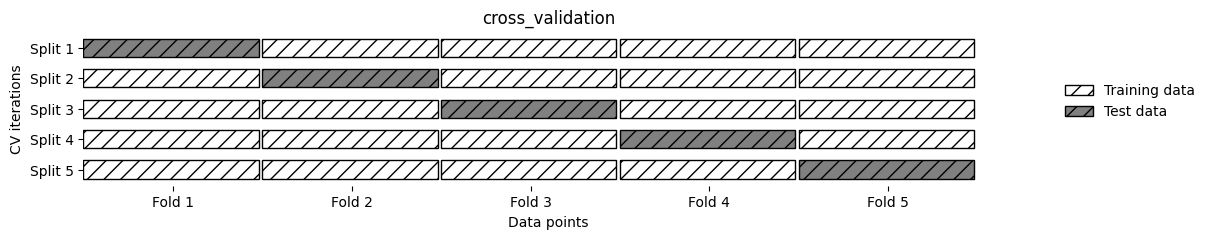

In [9]:
import mglearn
mglearn.plots.plot_cross_validation()

#### Our typical supervised learning set up is as follows:

- We are given training data with features `X` and target `y`
- We split the data into train and test portions: `X_train, y_train, X_test, y_test`
- We carry out hyperparameter optimization using cross-validation on the train portion: `X_train` and `y_train`.
- We assess our best performing model on the test portion: `X_test` and `y_test`.  
- What we care about is the **test error**, which tells us how well our model can be generalized.
- If this test error is "reasonable" we deploy the model which will be used on new unseen examples.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = DecisionTreeClassifier(max_depth=10)
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.005248,0.002205,0.916667,1.0
1,0.002313,0.001619,1.000000,1.0
2,0.002171,0.001663,0.909091,1.0
3,0.002189,0.001772,1.000000,1.0
4,0.002180,0.001522,0.636364,1.0
5,0.002556,0.001636,0.818182,1.0
6,0.003071,0.001933,1.000000,1.0
7,0.002151,0.001480,0.909091,1.0
8,0.002982,0.002206,1.000000,1.0
9,0.002860,0.001813,0.909091,1.0


In [11]:
pd.DataFrame(pd.DataFrame(scores).mean())

,0
fit_time,0.002772
score_time,0.001785
test_score,0.909848
train_score,1.000000


- How do we know whether this test score is reasonable?

In [12]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
skf = StratifiedShuffleSplit(n_splits=2, train_size = .8)
X = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"Fold {i}:")
    print(f" {iris_df.iloc[train_index]['class'].value_counts()}")
    print("-"*10)
    print(f" {iris_df.iloc[test_index]['class'].value_counts()}")
    print("*" * 60)

Fold 0:
 class
0    40
1    40
2    40
Name: count, dtype: int64
----------
 class
0    10
2    10
1    10
Name: count, dtype: int64
************************************************************
Fold 1:
 class
2    40
0    40
1    40
Name: count, dtype: int64
----------
 class
1    10
0    10
2    10
Name: count, dtype: int64
************************************************************


- We will try to use "validation" to refer to data where we have access to the target values.
  - But, unlike the training data, we only use this for hyperparameter tuning and model assessment; we don't pass these into `fit`.  
- We will try to use "test" to refer to data where we have access to the target values
  - But, unlike training and validation data, we neither use it in training nor hyperparameter optimization.
  - We only use it **once** to evaluate the performance of the best performing model on the validation set.   
  - We lock it in a "vault" until we're ready to evaluate.

Note that there isn't good concensus on the terminology of what is validation and what is test.